---
title: "Orientation"
---

## Setup

In [6]:
#| hide
import polars as pl
from ids_finder.utils.basic import load_catalog

from beforerr.r import py2rpy_polars
import rpy2.robjects as robjects

from ids_finder.pipelines.project.pipeline import process_events_l2

import hvplot.polars
import warnings

# Suppress specific FutureWarning from pandas in Holoviews
warnings.filterwarnings(
    "ignore", category=FutureWarning, module="holoviews.core.data.pandas"
)


In [3]:
#| hide
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython

catalog = load_catalog()

r = robjects.r
r.source('utils.R')
conv_pl = py2rpy_polars()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython

 Found  1  deps for  0/1  pkgs [⠋] Resolving standard (CRAN/BioC) packages
 
ℹ No downloads are needed

Installing...
✔ 1 pkg + 77 deps: kept 58 s]


In [4]:
all_events_l1 : pl.DataFrame = catalog.load('events.l1.ALL_sw_ts_1s_tau_60s').collect()
JNO_events_l1 = all_events_l1.filter(pl.col('sat') == 'JNO')
other_events_l1 = all_events_l1.filter(pl.col('sat') != 'JNO')
all_events_l2 = all_events_l1.pipe(process_events_l2)

%R -i JNO_events_l1 -c conv_pl
%R -i all_events_l1 -c conv_pl
%R -i other_events_l1 -c conv_pl
%R -i all_events_l2 -c conv_pl

[11/29/23 16:23:23] INFO     Loading data from 'events.l1.ALL_sw_ts_1s_tau_60s'                 ]8;id=878342;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=40680;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (LazyPolarsDataset)...                                                                

## Orientation

In [5]:
def dist_plot(df: pl.LazyFrame, var, by="sat"):
    return df.hvplot.density(var, by=by, subplots=True, width=300, height=300).cols(1)

In [7]:
(dist_plot(all_events_l1, "k_x") + dist_plot(all_events_l1, "k_y") + dist_plot(all_events_l1, "k_z")).cols(3)

:Layout
   .NdLayout.I   :NdLayout   [sat]
      :Distribution   [k_x]   (Density)
   .NdLayout.II  :NdLayout   [sat]
      :Distribution   [k_y]   (Density)
   .NdLayout.III :NdLayout   [sat]
      :Distribution   [k_z]   (Density)

In [ ]:
# all_events_l1.hvplot.scatter("k_x", "k_y", by="sat", subplots=True, width=300, height=300,  datashade=True)
# all_events_l1.hvplot.bivariate("k_x", "k_y", by="sat", subplots=True, width=600, height=500) # bug: `by` not working

In [8]:
%%R
pak::pkg_install("ggdensity")
library(ggdensity)


 Found  30  deps for  1/1  pkgs [⠋] Checking installed packages
 
ℹ No downloads are needed

Installing...
✔ 1 pkg + 28 deps: kept 21 s]


  Please cite ggdensity! See citation("ggdensity") for details.


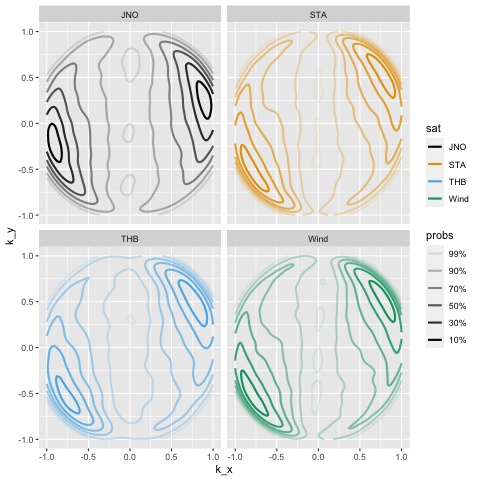

In [9]:
%%R
probs <- c(0.99, 0.9, 0.7, 0.5, 0.3, 0.1)
ggplot(all_events_l1, aes(x=k_x, y=k_y, color=sat) ) +
  geom_hdr_lines(probs = probs) +
  facet_wrap(vars(sat)) +
  scale_color_okabeito(palette = "black_first")

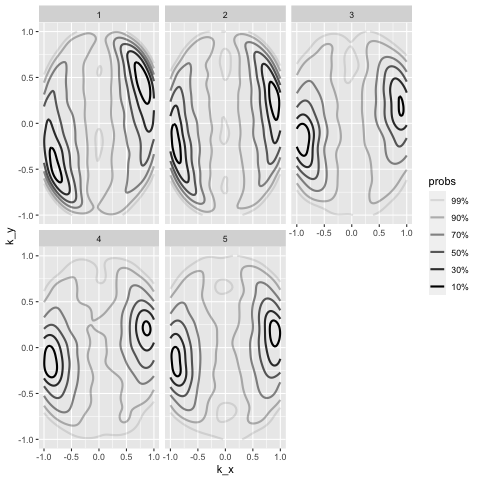

In [ ]:
%%R
ggplot(JNO_events_l1, aes(x=k_x, y=k_y) ) +
  geom_hdr_lines(probs = probs) +
  facet_wrap(vars(r_bin))

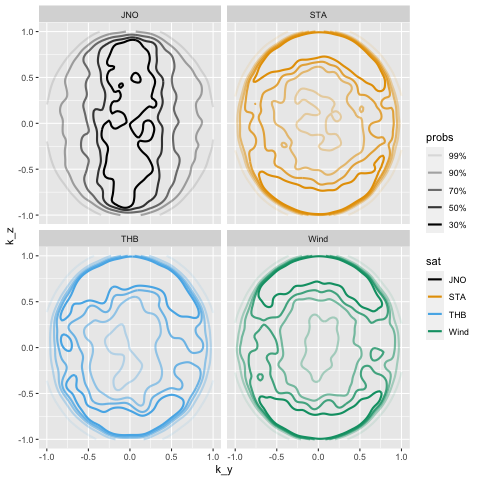

In [ ]:
%%R
probs <- c(0.99, 0.9, 0.7, 0.5, 0.3)
ggplot(all_events_l1, aes(x=k_y, y=k_z, color=sat) ) +
  geom_hdr_lines(probs = probs) +
  facet_wrap(vars(sat)) +
  scale_color_okabeito(palette = "black_first")

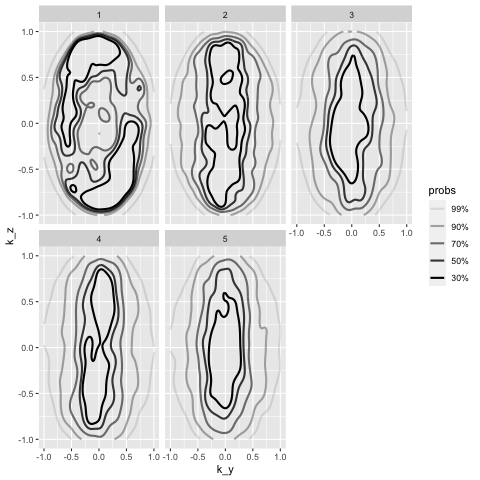

In [ ]:
%%R
probs <- c(0.99, 0.9, 0.7, 0.5, 0.3)
ggplot(JNO_events_l1, aes(x=k_y, y=k_z) ) +
  geom_hdr_lines(probs = probs) +
  facet_wrap(vars(r_bin)) +
  scale_color_okabeito(palette = "black_first")

### $V_l$

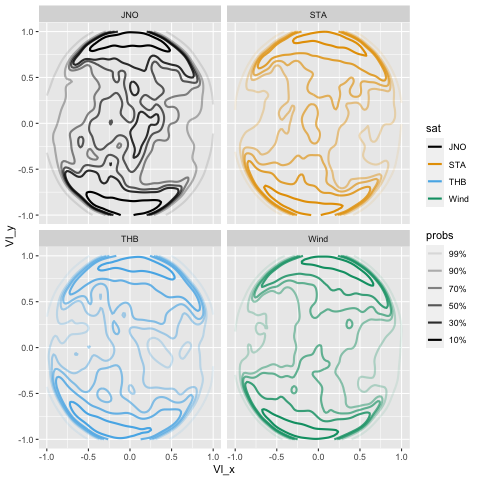

In [ ]:
%%R
probs <- c(0.99, 0.9, 0.7, 0.5, 0.3, 0.1)
ggplot(all_events_l1, aes(x=Vl_x, y=Vl_y, color=sat) ) +
  geom_hdr_lines(probs = probs) +
  facet_wrap(vars(sat)) +
  scale_color_okabeito(palette = "black_first")

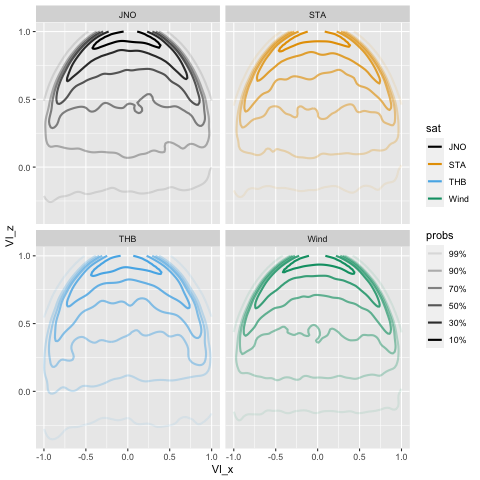

In [ ]:
%%R
probs <- c(0.99, 0.9, 0.7, 0.5, 0.3, 0.1)
ggplot(all_events_l1, aes(x=Vl_x, y=Vl_z, color=sat) ) +
  geom_hdr_lines(probs = probs) +
  facet_wrap(vars(sat)) +
  scale_color_okabeito(palette = "black_first")

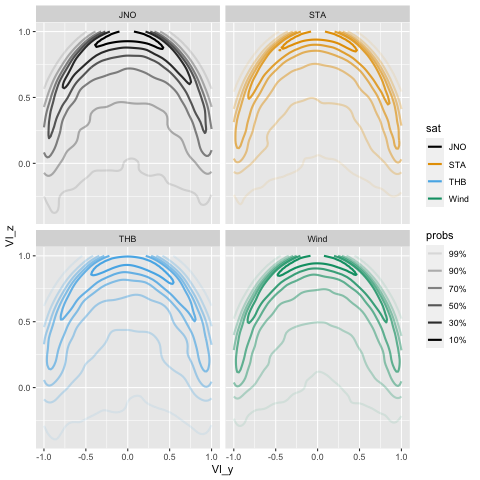

In [ ]:
%%R
probs <- c(0.99, 0.9, 0.7, 0.5, 0.3, 0.1)
ggplot(all_events_l1, aes(x=Vl_y, y=Vl_z, color=sat) ) +
  geom_hdr_lines(probs = probs) +
  facet_wrap(vars(sat)) +
  scale_color_okabeito(palette = "black_first")

### Evolution

In [ ]:
%%R
x_var <- "time"
y_vars <- c("k_x", "k_y", "k_z")
xlab <- "Time"
ylabs <- c("Orientation (k_x)", "k_y", "k_z")
p <- plot_util(all_events_l2, x_var = x_var, y_vars = y_vars, xlab=xlab, ylabs=ylabs)
save_plot("orientation/orientation_k_time")

x_var <- "ref_radial_distance"
xlab <- "Referred Radial Distance (AU)"
p <- plot_util(all_events_l2, x_var=x_var, y_vars = y_vars, xlab=xlab, ylabs=ylabs)
save_plot("orientation/orientation_k_r")

x_var <- "ref_radial_distance"
y_vars <- c("Vl_x", "Vl_y", "Vl_z")
xlab <- "Referred Radial Distance (AU)"
ylabs <- c("Orientation (l_x)", "l_y", "l_z")
p <- plot_util(all_events_l2, x_var=x_var, y_vars = y_vars, xlab=xlab, ylabs=ylabs)
save_plot("orientation/orientation_l_r")

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


In addition: There were 30 warnings (use warnings() to see them)


In [ ]:
%%R
x_col <- "radial_distance"
y_col <- "k_x"
y_lim <- NULL
x_bins <- 16
y_bins <- 32
xlab <- "Radial Distance (AU)"
ylab <- "Orientation (k_x)"
p <- plot_binned_data(JNO_events_l1, x_col = x_col, y_col = y_col, x_bins = x_bins, y_bins=y_bins, y_lim = y_lim, log_y = FALSE)
p <- p + labs(x = xlab, y= ylab)
save_plot("orientation/orientation_kx_r_dist")

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
